# Seeing how notebooks compare to just plain Markdown

## What is a Jupyter Notebook

Well it's a document that lets you render markdown code, display code blocks, and also allows you to execute those code blocks and display their results interactively!
Needless to say, they are definitely game changers.
It's like the Python interpreter on steroids!

They are perfect for academia, data scientist, and anyone else that wants to explore data and code and be able to reproduce and/or show how they did it all in the same document.
There is a large movement in the scientific community to include the code that was used on research papers, and Notebooks are filling that niche perfectly!

## Update to my newpost script

To show a little bit about what Notebooks can do, I'll demonstrate by talking about my `newpost.py` script.
I had orginally written it to create the basic structure of new blog posts, but in [Markdown](https://daringfireball.net/projects/markdown/).
Since I'm going to start using [Jupyter Notebooks](https://jupyter.org/install.html) as well, I decided to spruce it up a bit and add support for them.
I want to keep my notebooks, vanilla.
Meaning that I don't want to shove the *metadata* required by [Pelican](https://blog.getpelican.com/) into them.
Since I didn't know how much code went into a blank notebook, I decided to just dump the *metadata* into an `.nbdata` file.
All that's left for me to do is to fire up JupyterLab, create a new book, and name it exactly like the `.nbdata` file.
I didn't want to bother with typing it all out, so I used [Pyperclip](https://github.com/asweigart/pyperclip) to copy the *slug* name into my clipboard.
Now a simple *paste* gets the job done!

### Imports and constants

The first thing any Python scripts starts with is importing all of the libraries that are going to be used at the beginning of the file, followed by any global variables.

In [14]:
from dataclasses import dataclass
from datetime import datetime
from pathlib import Path
from typing import List

import pyperclip

AUTHOR = "Martin Uribe"
ARTICLE_LOCATION = Path("content", "articles")

As you can see, that looks like any other code block that you normally see on blog posts, but this one is actually "active".
Let me demonstrate. The following will be a simple Python `print()` command, and the output that follows will be generated and not typed in by me: <a href='javascript:toggle_code()'>[on/off]</a>

In [18]:
print(f"{AUTHOR.split()[0]} is storing his blog articles in {ARTICLE_LOCATION.absolute()}")

Martin is storing his blog articles in /home/mohh/Projects/ghpages/content/articles/content/articles


Pretty nice, right?

### Article class

I think you're starting to see how powerful working in notebooks really is.
Let's continue with the rest of the script.
Here is the `Article` class that I created for it: <a href='javascript:toggle_code()'>[on/off]</a>

In [19]:
@dataclass
class Article:
    title: str
    category: str
    tags: List[str]
    summary: str
    markdown: bool

    def __post_init__(self):
        self.category = self.category.title()
        self.date = datetime.today().strftime("%Y-%m-%d %H:%M")
        self.slug = self.title.lower().replace(" ", "-")
        self.author = AUTHOR
        if self.markdown:
            self.location = ARTICLE_LOCATION.joinpath(f"{self.slug}.md")
        else:
            self.location = ARTICLE_LOCATION.joinpath(f"{self.slug}.nbdata")

    def create_file(self):
        header = f"title: {self.title}\n"
        header += f"date: {self.date}\n"
        header += f"category: {self.category}\n"
        header += f"tags: {self.tags}\n"
        header += f"slug: {self.slug}\n"
        header += f"author: {self.author}\n"
        header += f"summary: {self.summary}\n"

        if self.markdown:
            header += f"\n# {self.title}\n\n"
        else:
            pyperclip.copy(self.slug)

        self.location.write_text(header)
        print(f"Generated new article: {self.location}")

Once again, this is all code that I can already start to interact with, but let me add the rest of the helper functions.

In [20]:
def get_bool(subject):
    value = input(f"{subject.capitalize():>10} [y]/n? ")
    if not value:
        return True
    return False


def get_input(subject):
    value = input(f"{subject:>10}: ")
    if not value:
        print(f"No subject provided!")
        exit

    return value.strip()


def get_tags():
    tags = []
    while True:
        tag = input("       tag: ")
        if tag:
            tags.append(tag.strip().lower())
        else:
            break

    return ", ".join(tags)

You can add functions in separate cells or all together like I did here, it really doesn't matter.
The one thing that you have to keep in mind though is that these cell blocks can all be executed in any order, so it's easy to have "old" code in memory that can still be used when working on other parts.
In cases like that where I've changed a lot of code, I like to just *Restart the Kernel and Rerun All Cells..* from the **Run** menu command from the JupyterLab interface.

![kernel-reset]({static}/images/kernel-reset.png)

### Playing around with the code

So the core of the script is now loaded.
Let's see what we can do.
As you can tell from looking at the class, we have to instantiate an instance by providing the following:

* **title**: *str*, A title for the new blog post
* **category**: *str*, A category to file it under
* **tags**: *List[str]*, A list of strings for the tags
* **summary**: *str*, A summary of of what the blog is going to be about
* **markdown**: *bool*, True or False if this is going to be a markdown file, if it's not it'll set it up for a notebook

This is where the helper functions come in handy.
I have the following execute when the script is ran: <a href='javascript:toggle_code()'>[on/off]</a> 

In [23]:
def main():
    title = get_input("title")
    category = get_input("category")
    tags = get_tags()
    summary = get_input("summary")
    markdown = get_bool("markdown")
    post = Article(title, category, tags, summary, markdown)
#     post.create_file()

I've commented out the last line that actually creates the file because I really don't want to create it at the moment, but let's the see the rest in action:

In [24]:
main()

     title:  Super awesome new blog post
  category:  Blog
       tag:  pelican
       tag:  python
       tag:  jupyterlab
       tag:  
   summary:  Today we are going to cover the sigmoid function
  Markdown [y]/n?  


Since the default is to create a markdown file, no answer was needed for the last question.

### Exploring the Article object

Ok, so what did that actually do?
Let's see!

In [25]:
post

NameError: name 'post' is not defined

Oh no, what happened?
Well when I normally run the script, it automatically creates the new file for me.
In this instance, it created the new `post` but it was lost in the `main` function because I didn't save its state!
I'll leave it up to you to explore what it contains, but it's pretty easy to see that it just filled in everything that I need to boilerplate a new pelican blog post.

## How can you do the same

Make sure that you're working in your virtual environment and go into the directory where you have your blog project.
Create a plugins directory if you don't already have one and go into it.
Then clone the plugin's repos directly into it.

```zsh
# from inside your project folder
mkdir plugins, cd $_
git clone https://github.com/danielfrg/pelican-ipynb ipynb
```

Open up your `pelicanconf.py` file and make the following changes/additions:

```python
MARKUP = ("md", "ipynb")
PLUGIN_PATHS = ["./plugins"]
PLUGINS = ["ipynb.markup"]
IGNORE_FILES = [".ipynb_checkpoints"]
IPYNB_USE_METACELL = False  # set to True if you want to embedd metadata into notebook
IPYNB_SKIP_CSS = True
```

Now, if you want to do what I'm doing and keep the *metadata* in its own file and out of the notebook, you'll have to create a file with the exact same name as the notebook but with the `.nbdata` extension.
The one for this article looks like this:

```
title: Playing around with Jupyter notebooks
date: 2020-03-09 19:43
modified: 2020-03-10 08:17
category: Blog
tags: jupyter, notebook, python
slug: playing-around-with-jupyter-notebooks
author: Martin Uribe
summary: Just giving the notebook plugin a test run to see how things render

```

Make sure there is an empty line at the end of the file.
To embed directly into the notebook, modify it like this and put it in the first cell:

```
- title: Playing around with Jupyter notebooks
- date: 2020-03-09 19:43
- modified: 2020-03-10 08:17
- category: Blog
- tags: jupyter, notebook, python
- slug: playing-around-with-jupyter-notebooks
- author: Martin Uribe
- summary: Just giving the notebook plugin a test run to see how things render
```

### Making it look pretty

Originally when the notebook was being converted into html, it was putting anchor tags at the end of headings that I didn't like it. 
![nb-anchor]({static}/images/nb-anchor.png)
Also, each code cell was getting a **In[1]** placed in front of it, indicating in which order it was run.
I don't need or want any of those, any code that I post will be expected to be ran in order.
To get rid of them, I created these custom CSS entries into the style sheet of my theme:

```css

// jupyter notebook
a.anchor-link {
    visibility: hidden;
}

.prompt, .output_prompt {
    visibility: hidden;
}
```

## Sample chart

I can't showcase a notebook without throwing in a bonus chart!
It's nothing fancy, but wanted to illustrate what is possible to do in these notebooks.
I snagged this example from the excellent book "Data Science from Scratch, Second Edition, by Joel Grus (O'Reilly). (C) 2019 Jeol Grus, 978-1-149-04113-9"

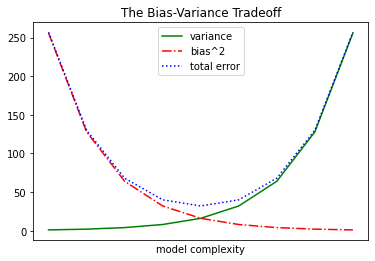

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

## Conclusion

So far, I can't complain.
This interface does seem a little nicer for some reason.
Perhaps I need to change the black theme of my [VSCode](https://code.visualstudio.com/) back to normal and see if that makes a difference in the "feels" department.
The notebook definitely gives me more options, but also takes some away.
For instance, I can't use the [liquid_tags](https://github.com/getpelican/pelican-plugins/tree/master/liquid_tags) Pelican plugin!

Like all things, it's going to take some more experimentation to see what works and what doesn't.